<a href="https://colab.research.google.com/github/CaesiumY/python-100-quiz/blob/master/python-100/%5B61%EB%B2%88%5D_%EB%AC%B8%EC%9E%90%EC%97%B4_%EC%95%95%EC%B6%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 61번 문자열 압축

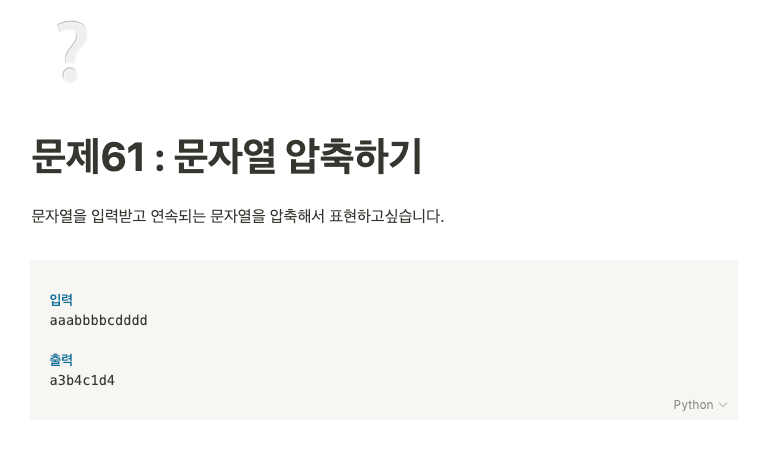


In [10]:
user_input = input()

result = ''
letter = user_input[0]
count = 0

for i in user_input:
  if i == letter:
    count += 1
  else:
    result += letter + str(count)
    letter = i
    count = 1

result += letter + str(count)

print(result)

aaabbbbcdddd
a3b4c1d4


## 문자열 압축 2

데이터 처리 전문가가 되고 싶은 어피치는 문자열을 압축하는 방법에 대해 공부를 하고 있습니다. 최근에 대량의 데이터 처리를 위한 간단한 비손실 압축 방법에 대해 공부를 하고 있는데, 문자열에서 같은 값이 연속해서 나타나는 것을 그 문자의 개수와 반복되는 값으로 표현하여 더 짧은 문자열로 줄여서 표현하는 알고리즘을 공부하고 있습니다.
간단한 예로 `aabbaccc`의 경우 `2a2ba3c`(문자가 반복되지 않아 한번만 나타난 경우 1은 생략함)와 같이 표현할 수 있는데, 이러한 방식은 반복되는 문자가 적은 경우 압축률이 낮다는 단점이 있습니다. 예를 들면, `abcabcdede`와 같은 문자열은 전혀 압축되지 않습니다. 어피치는 이러한 단점을 해결하기 위해 문자열을 1개 이상의 단위로 잘라서 압축하여 더 짧은 문자열로 표현할 수 있는지 방법을 찾아보려고 합니다.

예를 들어, `ababcdcdababcdcd`의 경우 문자를 1개 단위로 자르면 전혀 압축되지 않지만, 2개 단위로 잘라서 압축한다면 `2ab2cd2ab2cd`로 표현할 수 있습니다. 다른 방법으로 8개 단위로 잘라서 압축한다면 `2ababcdcd`로 표현할 수 있으며, 이때가 가장 짧게 압축하여 표현할 수 있는 방법입니다.

다른 예로, `abcabcdede`와 같은 경우, 문자를 2개 단위로 잘라서 압축하면 `abcabc2de`가 되지만, 3개 단위로 자른다면 `2abcdede`가 되어 3개 단위가 가장 짧은 압축 방법이 됩니다. 이때 3개 단위로 자르고 마지막에 남는 문자열은 그대로 붙여주면 됩니다.

압축할 문자열 `s`가 매개변수로 주어질 때, 위에 설명한 방법으로 1개 이상 단위로 문자열을 잘라 압축하여 표현한 문자열 중 가장 짧은 것의 길이를 return 하도록 solution 함수를 완성해주세요.


In [52]:
def solution(s):  
  length = len(s)
  result = []
  answer = ""

  if length <= 1: # 길이가 1이하면 그대로 출력
    return length
  
  for unit in range(1, (length // 2) + 1): # 단위 별로 모두 해봐야 하므로 반복문
    count = 1 # 1은 안 셀 거기 때문에 1부터 카운트 해준다
    target = s[:unit] # 목표가 되는 문자열

    for i in range(unit, length, unit): # 목표를 제외하고, 문자열의 길이만큼 단위만큼 뛰어준다.
      if target == s[i:i+unit]: # 목표와 목표 ~ 목표 + 단위까지 같다면 1을 더해준다.
        count += 1
      else: # 같지 않다면
        if count == 1: # 1은 없애줘야한다
          count = "" 
        answer += str(count) + target # 정산해준다. 
        target = s[i:i+unit] # 목표를 다음 단위로 바꿔준다.
        count = 1 # 카운트 초기화
    
    if count == 1: # 마지막 단위 앞에 카운트 생기는 걸 없애줌
          count = ""
    answer += str(count) + target # 마지막 단위별 넣어줌

    result.append([unit, answer, len(answer)])
    
    answer = "" # 새로운 단위를 위해 초기화
  
  return result

user_input = input()
print(solution(user_input))

ababcdcdababcdcd
[[1, 'ababcdcdababcdcd', 16], [2, '2ab2cd2ab2cd', 12], [3, 'ababcdcdababcdcd', 16], [4, 'ababcdcdababcdcd', 16], [5, 'ababcdcdababcdcd', 16], [6, 'ababcdcdababcdcd', 16], [7, 'ababcdcdababcdcd', 16], [8, '2ababcdcd', 9]]
